# Deciphering Data Science
Created  by Grishma Jena for DevPulseCon 2019


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Classification - Identifying malignant breast cancer 
This falls in the category of Supervised learning as there are labels (benign/malignant) associated with the data. 
The dataset from UCI ML repository contains characteristics derived from images of cell nuclei for solid breast masses. More information about it can be found here: http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29. <br> Demo adapted from https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3 and https://colab.research.google.com/drive/1YfZJ0MGQUhdplI06uvtnUwmPJsIxkOYM#scrollTo=HlAbyAhV1hkM.

### Question - Given characterists for a breast mass, can we predict if it is malignant or benign?

### Loading data

In [0]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
data = pd.DataFrame(raw_data.data, raw_data.target, columns=raw_data.feature_names) # Converting to Pandas df
data['label'] = raw_data.target
data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [0]:
print('Features present:', data.columns)

Features present: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')


### Data wrangling and exploration 

Dimensions of data: (569, 31)


Text(0.5, 1.0, 'Distribution of Malignant and Benign masses')

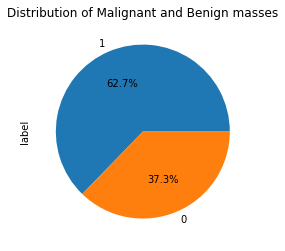

In [0]:
print('Dimensions of data:', data.shape)
%matplotlib inline
data.label.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Malignant and Benign masses')

In [0]:
print('Number of data points with null value:')
data.isnull().sum()

Number of data points with a null value:


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [0]:
print('Number of data points with NA value:')
data.isna().sum()

Number of data points with NA value:


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [0]:
num_bins = 10
malignant_data = data[data.label == 1]
benign_data = data[data.label == 0]

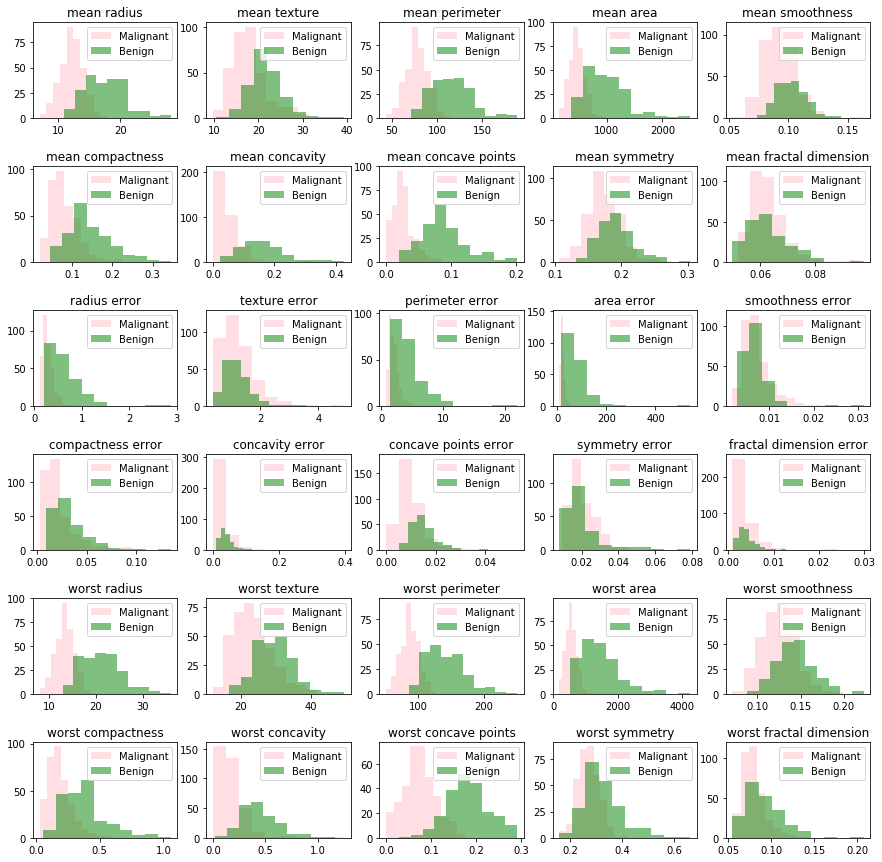

In [0]:
from matplotlib import pyplot

fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
idx = 0

for x_i in range(0, 6):
    for y_i in range(0, 5):
        ax[x_i, y_i].hist(malignant_data.iloc[:,idx], bins, alpha=0.5, label='Malignant', color='pink')
        ax[x_i, y_i].hist(benign_data.iloc[:,idx], bins, alpha=0.5, label='Benign', color='green')
        ax[x_i, y_i].legend(loc='upper right')
        ax[x_i,y_i].set_title(data.columns[idx])
        idx += 1

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = data.iloc[:, 0:-1]
Y = data.iloc[:, -1]
print('Scaled features')
X = sc.fit_transform(X)
X

Scaled features


array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Model building

In [0]:
from sklearn.model_selection import train_test_split

print('Splitting the data into training and test sets')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print('Training set:', X_train.shape)
print('Testing set:', X_test.shape)

Splitting the data into training and test sets
Training set: (455, 30)
Testing set: (114, 30)


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier()
print('Training a Decision Tree classifier on the training data')
clf.fit(X_train, Y_train)

Training a Decision Tree classifier on the training data


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

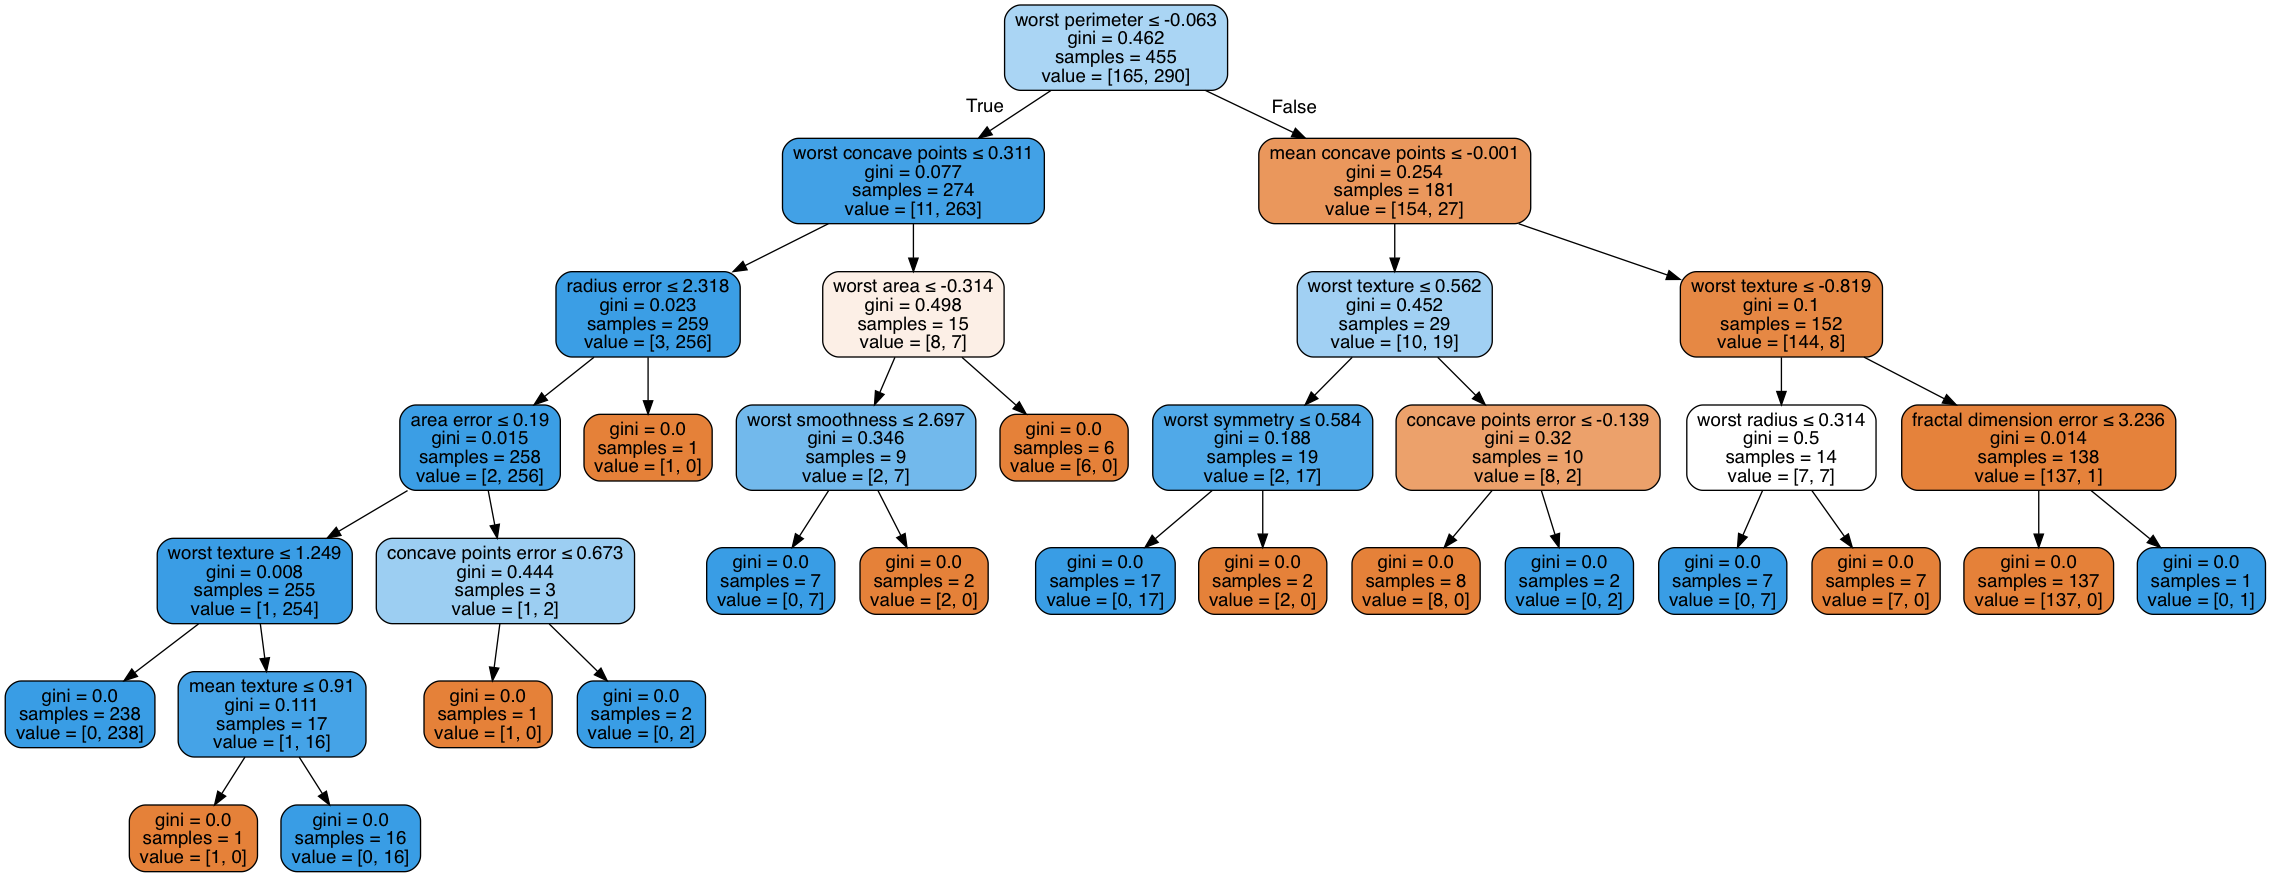

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, 
                special_characters=True, feature_names=data.columns[:-1])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Testing the model
*Precision* is the fraction of information retrieved that is relevant i.e. of all patients we predicted have cancer, what fraction of them actually have cancer?

*Recall* is the fraction of relevant information that are retrieved i.e. of all patients in the set that actually have cancer, what fraction did we correctly detect?

In the classification report, the reported averages include micro average (averaging the total true positives, false negatives and false positives), macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label).

*Confusion matrix*
![image.png](attachment:image.png)

Precision = True positive / Number of predicted positive = TP / (TP +FP)

Recall = True positive / Number of actual positive = TP / (TP + FN)

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
Y_pred = clf.predict(X_test)
print('Accuracy: {:.3f}'.format(accuracy_score(Y_test, Y_pred)))
print(classification_report(Y_test, Y_pred))

Accuracy: 0.904
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        47
           1       0.90      0.94      0.92        67

   micro avg       0.90      0.90      0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



### Visualizing results

Text(0.5, 15.0, 'Predicted Class')

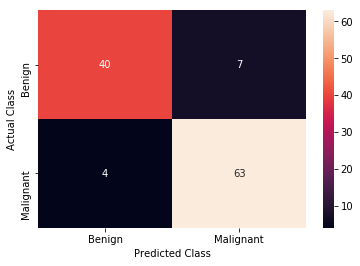

In [0]:
import seaborn as sns

conf_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = '.0f', 
        xticklabels = ['Benign', 'Malignant'], yticklabels = ['Benign', 'Malignant'])
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

### The current model is able to predict malignant or benign masses with 90% accuracy

## Clustering
A type of Unsupervised learning as there are no labels associated with the data. It is used to find the inherent structure within data. Adapted from https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097

## K Means algorithm

In [0]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

data = make_blobs(n_samples=200, n_features=2, centers=5, cluster_std=1.6, random_state=50)
points = data[0]

(-15, 15)

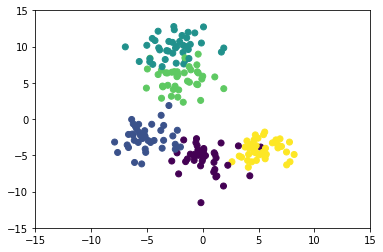

In [0]:
%matplotlib inline
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

In [0]:
from sklearn.cluster import KMeans
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'pink', 'orange', 'cyan']

k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(points)
print('Cluster centers:\n', kmeans.cluster_centers_)

Cluster centers:
 [[-2.03497139  5.3458536 ]
 [ 5.28496718 -4.27502287]
 [-2.52232891  9.91764427]
 [-5.23881235 -2.52570294]
 [-0.13488816 -5.41721373]]


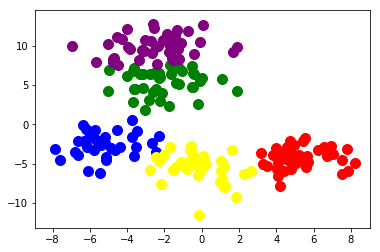

In [0]:
Y_pred = kmeans.fit_predict(points)

for idx in range(0, k):
    plt.scatter(points[Y_pred == idx, 0], points[Y_pred == idx, 1], s=100, c=colors[idx])

## Clustering for Topic Modeling - Identifying topics in text

Topic modeling is an unsupervised ML method. Used to find inherent structure in documents. Use it to learn
representations of topics in different documents. Can also be used to group different documents together. We will
use ```Gensim``` library and Latent Dirichlet Allocation for this.

LDA’s approach to topic modeling is it considers each document as a collection of topics in a certain proportion. And each topic as a collection of keywords, again, in a certain proportion.

Once you provide the algorithm with the number of topics, all it does it to rearrange the topics distribution within the documents and keywords distribution within the topics to obtain a good composition of topic-keywords distribution.

Adapted from https://kleiber.me/blog/2017/07/22/tutorial-lda-wikipedia/

In [0]:
import wikipedia
import random

def fetch_data():
    wikipedia_random_articles = wikipedia.random(2)
    wikipedia_random_articles.extend(['Music', 'Gardening', 'Reading', 'San Francisco', 'Mountain View'])
    wikipedia_random_articles
    print(wikipedia_random_articles)
    
    wikipedia_articles = []
    for wikipedia_article in wikipedia_random_articles:
        wikipedia_articles.append([wikipedia_article, 
                                   wikipedia.page(wikipedia_article).content])
    return wikipedia_articles

In [0]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

def clean(article):
    title, document = article
    tokens = RegexpTokenizer(r'\w+').tokenize(document.lower())
    tokens_clean = [token for token in tokens if token not in 
                    stopwords.words('english')]
    tokens_stemmed = [PorterStemmer().stem(token) for token 
                      in tokens_clean]
    return (title, tokens_stemmed)

In [0]:
from gensim import corpora, models
import gensim

wikipedia_articles = fetch_data()
wikipedia_articles
wikipedia_articles_clean = list(map(clean, wikipedia_articles))

article_contents = [article[1] for article in wikipedia_articles_clean]
dictionary = corpora.Dictionary(article_contents)
corpus = [dictionary.doc2bow(article) for article in 
          article_contents[:-1]] # All except 'California'

['Conus eximius', 'Louis Creek', 'Music', 'Gardening', 'Reading', 'San Francisco', 'Mountain View']


In [0]:
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, 
                                            id2word = dictionary, 
                                            passes=100)

topic_results = lda_model.print_topics(num_topics=5, num_words=5)

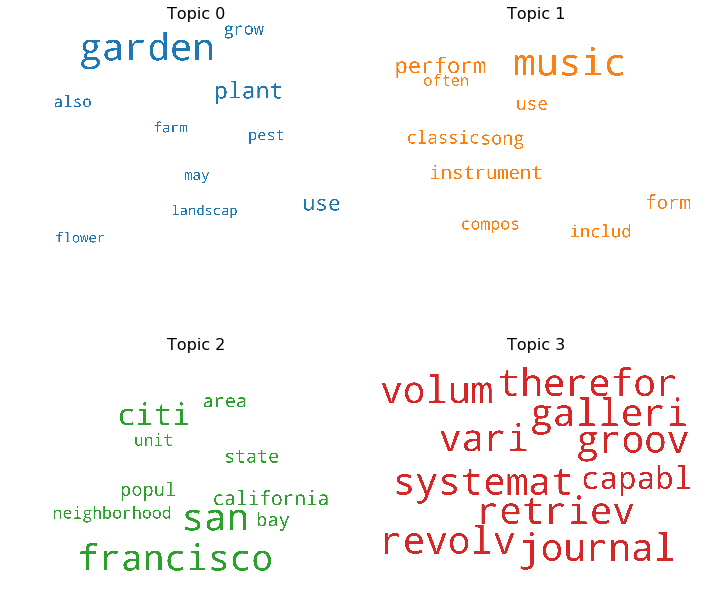

In [0]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [0]:
from operator import itemgetter

similarity = list(lda_model[[dictionary.doc2bow(article_contents[-1])]])
print('Similarity to each of the topics:', similarity[0])
match = max(similarity[0], key=itemgetter(1))
print('Given topic is most similar to topic', match[0], ' with a similarity of', match[1])

Similarity to each of the topics: [(0, 0.041986004), (1, 0.06571387), (2, 0.82360303), (3, 0.020103302), (4, 0.048593797)]
Given topic is most similar to topic 2  with a similarity of 0.82360303
